# Задание
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

# **Бета-распределение**

Для этого задания я выбрал бета-распределение, плотность вероятности которого описывается формулой:

$$f(x, \alpha, \beta) = \frac{\Gamma(\alpha + \beta)x^{\alpha - 1}(1 - x)^{\beta - 1}}{\Gamma(\alpha)\Gamma(\beta)} $$

где $\Gamma(z)$ - гамма-функция.
Распределение определено для $0 \leq x \leq 1$, $\alpha \gt 0$, $\beta \gt 0$

Бета-распределение реализовано в пакете scipy.stats под названием beta. В зависимости от параметров $\alpha$ и $\beta$, оно принимает различный вид. Нарисуем несколько вариантов, чтобы посмотреть, как это выглядит с разными параметрами.

In [1]:
from scipy.stats import beta
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('fivethirtyeight')

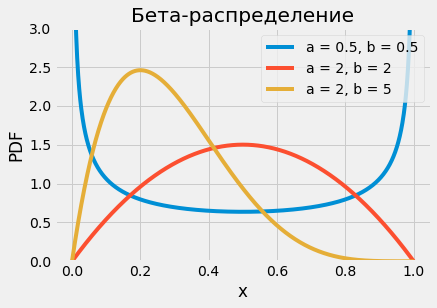

In [2]:
x = np.linspace(0, 1, 1000)
for a, b in [(0.5, 0.5), (2, 2), (2, 5)]:
    dist = beta(a, b)
    plt.plot(x, dist.pdf(x), label='a = %s, b = %s' % (a, b));
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.ylim(0, 3)
    plt.title('Бета-распределение')
    plt.legend()

Для дальнейшей работы я выберу распределение с параметрами $\alpha = 2$ и $\beta = 2$.

Генерируем из распределения выборку размером 1000, строим гистограмму полученной выборки и теоретическое распределение поверх неё.

In [3]:
dist = beta(2, 2)
sample = dist.rvs(1000)

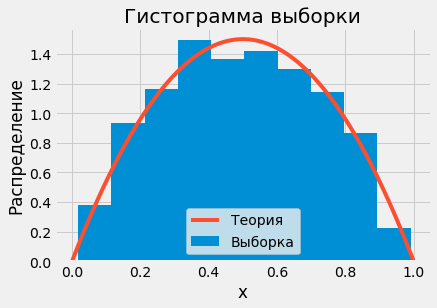

In [4]:
plt.hist(sample, density=True, label='Выборка')
plt.plot(x, dist.pdf(x), label='Теория')
plt.xlabel('x')
plt.ylabel('Распределение')
plt.title('Гистограмма выборки')
plt.legend();

Напишем функцию, которая будет брать 1000 выборок размера $n$ из распределения и строить гистограмму распределения их выборочных средних и плотность соответствующего им нормального распределения.

Чтобы построить соответствующие нормальные распределения, необходимо посчитать среднее и дисперсию (на вход функции нужно подать стандартное отклонение, которое равно квадратному корню из дисперсии). Согласно центральной предельной теореме, распределение выборочных средних приближается нормальным рапсределением с параметрами: 

$$N(E(X), \frac{D(X)}{n})$$ 

Математическое ожидание бета-распределения определяется как: $$E(X) = \frac{\alpha}{\alpha + \beta}$$
Дисперсия: $$D(X) = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} $$ 


Чтобы получить приближение дисперсии, её необходимо поделить на размер выборки, после чего извлечь квадратный корень, чтобы получить приближение стандартного отклонения.
Для подсчёта математического ожидания и стандартного отклонения заведём функции *expectation* и *deviation*.

In [5]:
def expectation(a, b):
    '''Returns expected value of beta-distribution'''
    return a / (a + b)

In [6]:
def deviation(a, b, n):
    '''Returns standard deviation of beta-distribution'''
    d = (a * b) / (a + b)**2 / (a + b + 1)
    return np.sqrt(d / n)

Проверим правильность формул для нашего распределения с $\alpha = 2$, $\beta = 2$ и $n = 5$

In [7]:
a, b = 2, 2

In [8]:
print(f'Реальное среднее распределения: {dist.mean()}')
print(f'Посчитанное среднее: {expectation(a, b)}')
print(f'Реальное стандартное отклонение распределения: {np.sqrt(dist.var() / 5)}')
print(f'Посчитанное среднее отклонение: {deviation(a, b, 5)}')

Реальное среднее распределения: 0.5
Посчитанное среднее: 0.5
Реальное стандартное отклонение распределения: 0.1
Посчитанное среднее отклонение: 0.1


Формулы работают правильно. Теперь построим гистограммы для выборок размерами 5, 10, 50.

In [9]:
def draw_mean_dist(a, b, n):
    '''Draws distribution of means for 1000 samples of size n'''
    means = []
    exp = expectation(a, b)
    dev = deviation(a, b, n)
    
    for i in range(1000):
        s = dist.rvs(n)
        means.append(np.mean(s))
    
    norm_dist = norm(loc=exp, scale=dev)
    x = np.linspace(0, 1, 1000)
    plt.hist(means, density=True, label='Выборка')
    plt.plot(x, norm_dist.pdf(x), label='N(%s, %s)' % (exp, round(dev, 2)))
    plt.title('n = %s' % n)
    plt.xlabel('x')
    plt.ylabel('Распределение')
    plt.legend()

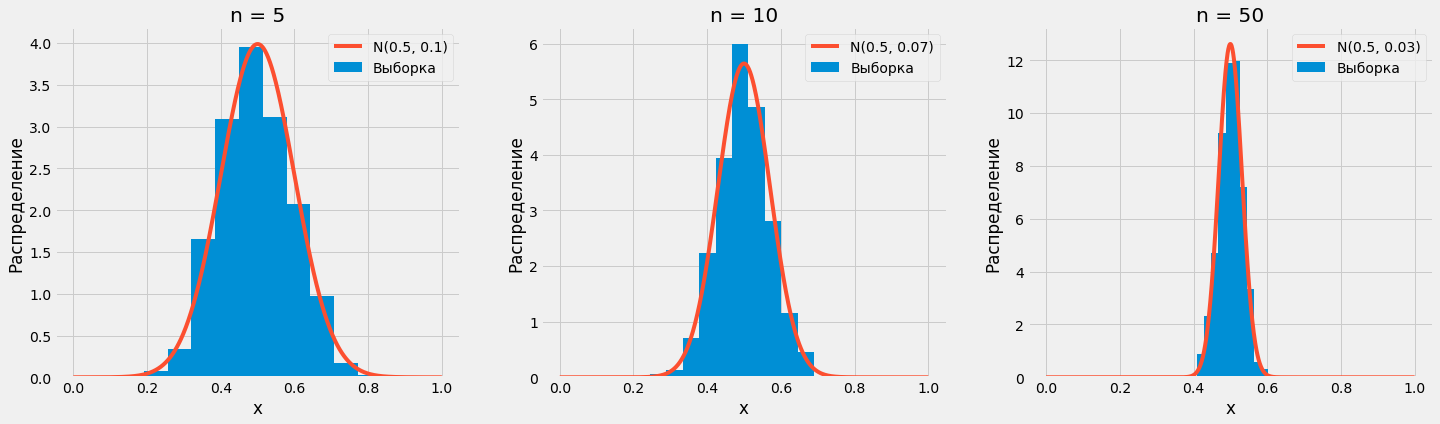

In [10]:
n = [5, 10, 50]
fig = plt.figure(figsize=(22,6))
for i in range(len(n)):
    fig.add_subplot(1, 3, i + 1)
    draw_mean_dist(a, b, n[i])

Из графиков распределений выборочных средних видно, что визуально среднее полученного распределения очень близко к настоящему среднему изначального распределения (0.5). Также видно, что при увеличении размера выборки разброс значений уменьшается, за счёт чего увеличивается точность оценки среднего значения изначального распределения.